# Time series ARIMA Forecasting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Step1: Import dataset

In [2]:
data_file = "BTC_USD-13-07-2010_27-02-2024.csv"
df = pd.read_csv(data_file,parse_dates= ['Date'],index_col=['Date'])

# Use only ['Close'] column
# Run only one time
df = df.iloc[:,[3]]
# Drop '2010-07' because it doesn't have enough 30(31) days
df = df.drop(df['Close']['2010-07'].index)
df.head()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4344\2410774239.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv(data_file,parse_dates= ['Date'],index_col=['Date'])


,Close
Date,
2024-02-27,57085.372307
2024-02-26,54522.401537
2024-02-25,51733.236602
2024-02-24,51571.103112
2024-02-23,50731.949191


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4959 entries, 2024-02-27 to 2010-08-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   4959 non-null   float64
dtypes: float64(1)
memory usage: 77.5 KB


<Axes: xlabel='Date'>

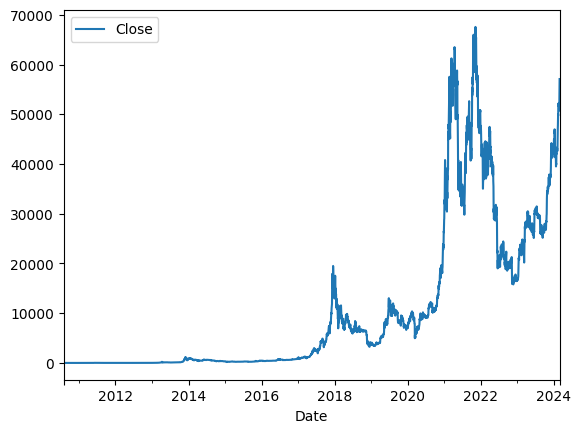

In [4]:
df.plot()

# Step 2: Resample data
By monthly (mean)

In [5]:
df = df['Close'].resample('M').mean()
df

Date
2010-08-31        0.065722
2010-09-30        0.062465
2010-10-31        0.112031
2010-11-30        0.271386
2010-12-31        0.248209
                  ...     
2023-10-31    29755.895133
2023-11-30    36596.164921
2023-12-31    42546.893300
2024-01-31    42919.612244
2024-02-29    48988.032831
Freq: M, Name: Close, Length: 163, dtype: float64

<Axes: xlabel='Date'>

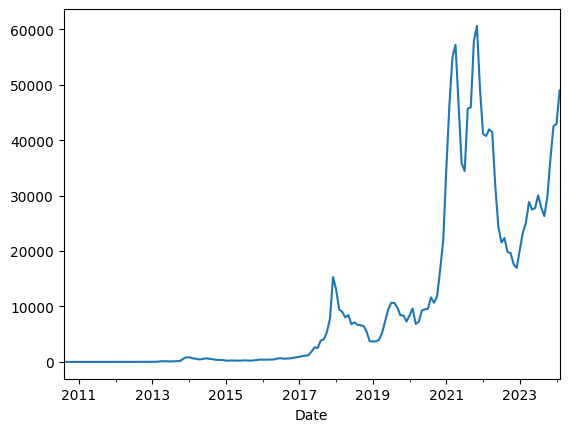

In [6]:
df.plot()

# Step 3: Stationarity check

In [7]:
import statsmodels.api as sm

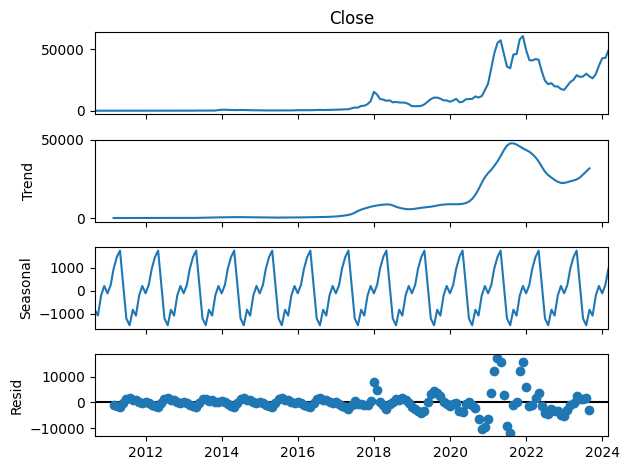

In [8]:
decomposition = sm.tsa.seasonal_decompose(df,model='additive')
fig = decomposition.plot()
plt.show()

# Another way to do step 3: Stationarity check
Source: Edureka (YT)

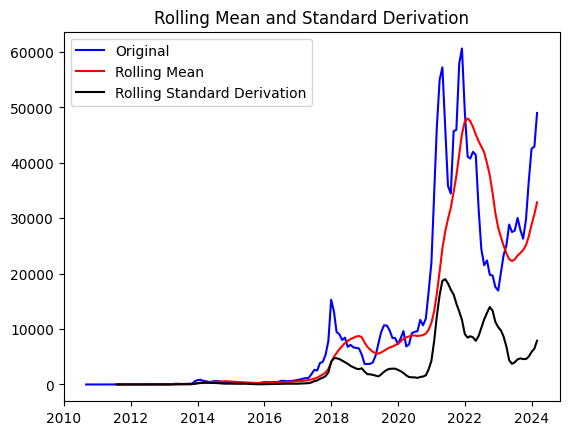

In [12]:
# Plot rolling statistics
def dataset_plot(data):
    """
    Plot rolling statistics
    """
    # Determine rolling statistics
    roll_mean = data.rolling(window=12).mean()
    roll_std = data.rolling(window=12).std()

    org = plt.plot(data, color="blue", label="Original")
    r_mean = plt.plot(roll_mean, color="red", label="Rolling Mean")
    r_std = plt.plot(roll_std, color="black", label="Rolling Standard Derivation")
    plt.legend(loc="best")
    plt.title('Rolling Mean and Standard Derivation')
    plt.show(block=False)


dataset_plot(df)

Augmented Dickey-Fuller (ADF) test

In [20]:
# Stationarity check by ADF
from statsmodels.tsa.stattools import adfuller
print('Result of ADF test:')
result = adfuller(df)

index = ['The test statistic','p-value','#Lags used','The number of observations']
adf_output = pd.Series(result[:4],index = index)
print(adf_output)
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

Result of ADF test:
The test statistic             -0.739603
p-value                         0.836223
#Lags used                      2.000000
The number of observations    160.000000
dtype: float64
Critical Values:
	1%: -3.472
	5%: -2.880
	10%: -2.576


We see that p-value: 0.836223 -> p too large --> the time series is NOT stationarity